In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/STATIC VS ROTATING.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/STATIC VS ROTATING/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/STATIC VS ROTATING/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 85 files belonging to 2 classes.
Found 41 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
3/3 [==============================] - 14s 2s/step - loss: 16.8241 - accuracy: 0.3765 - val_loss: 1.0728 - val_accuracy: 0.3659
Epoch 2/10
3/3 [==============================] - 2s 437ms/step - loss: 4.1081 - accuracy: 0.7529 - val_loss: 0.7210 - val_accuracy: 0.6341
Epoch 3/10
3/3 [==============================] - 3s 748ms/step - loss: 2.4750 - accuracy: 0.8824 - val_loss: 1.9931 - val_accuracy: 0.6341
Epoch 4/10
3/3 [==============================] - 6s 1s/step - loss: 1.8448 - accuracy: 0.8471 - val_loss: 3.4169 - val_accuracy: 0.6341
Epoch 5/10
3/3 [==============================] - 2s 418ms/step - loss: 1.6930 - accuracy: 0.8824 - val_loss: 4.9261 - val_accuracy: 0.6341
Epoch 6/10
3/3 [==============================] - 3s 719ms/step - loss: 0.4341 - accuracy: 0.9647 - val_loss: 7.6513 - val_accuracy: 0.6341
Epoch 7/10
3/3 [==============================] - 4s 730ms/step - loss: 1.1055 - accuracy: 0.9529 - val_loss: 10.5011 - val_accuracy: 0.6341
Epoch 8/10
3/3 [=======

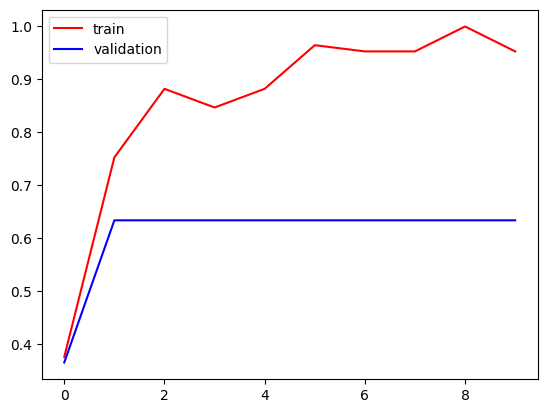

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

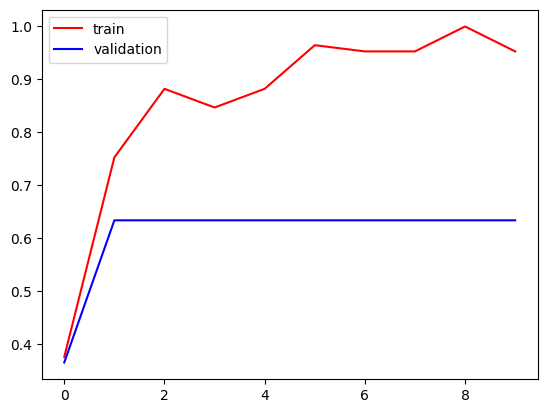

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

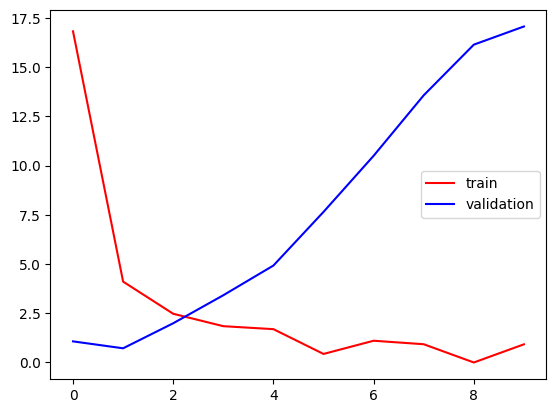

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

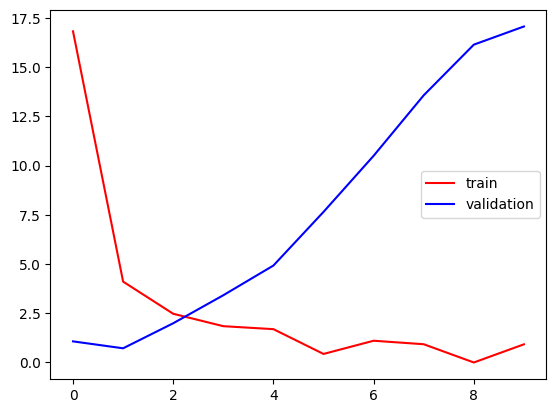

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
import cv2

In [41]:
test_img =cv2.imread('/content/STATIC VS ROTATING/train/static/compressed_24.jpg')

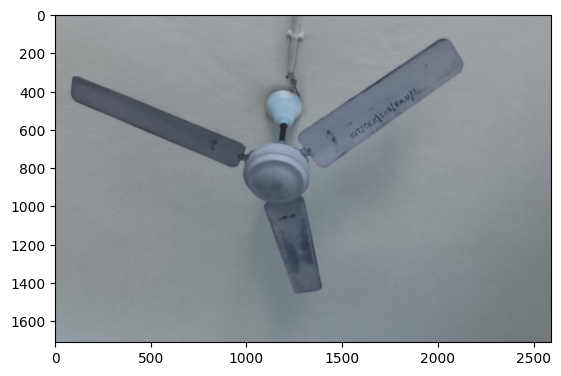

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(1710, 2591, 3)

In [44]:
test_img = cv2.resize(test_img,(256,256))

In [45]:
test_input = test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [47]:
import numpy as np
model.predict(test_input)
predict=model.predict(test_input)
predict=predict>0.5
if predict[0] == 0:
   predict = ' rotating fan'
else:
   predict = 'static fan'
print("our model says it is a:",predict)

1/1 [==============================] - 0s 29ms/step
our model says it is a: static fan
